In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pickle
import sklearn
from sklearn import linear_model

In [2]:
# function to plot confusion matrix
# this function is from sklearn website
# link - http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
# loading the cleaned training tweets
with open('SentimentText_train.txt', 'rb') as f:
    SentimentText_train = pickle.load(f)

In [4]:
# finally loading the cleaned test tweets on which we have to do sentiment analysis and report to kaggle
with open('SentimentText_test.txt', 'rb') as f:
    SentimentText_test = pickle.load(f)

In [5]:
# getting the target values i.e wheather the tweets are positive or negative
train_df = pd.read_csv('train.csv',encoding = 'ISO-8859-1')
y = train_df['Sentiment']



> Using Unigram




In [86]:
#Finding the unigram representation
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()

In [87]:
# fitting the vectorizer
X=vectorizer.fit_transform(SentimentText_train)

In [88]:
X.shape

(99989, 41679)

In [89]:
y.shape

(99989,)

In [90]:
# splitting into training and testing set so as to evaluate our classifier
from sklearn.model_selection import train_test_split
X_train,X_test, y_train ,y_test = train_test_split(X,y,test_size =0.2 ,random_state=0)

In [91]:
# fitting the multinomial bayes classifier
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

In [92]:
model.fit(X_train,y_train)

MultinomialNB()

In [93]:
# training score
model.score(X_train,y_train)

0.821979972746934

In [94]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test,y_test)

0.7537753775377538

Confusion matrix, without normalization
[[6272 2510]
 [2414 8802]]
Normalized confusion matrix
[[0.71 0.29]
 [0.22 0.78]]


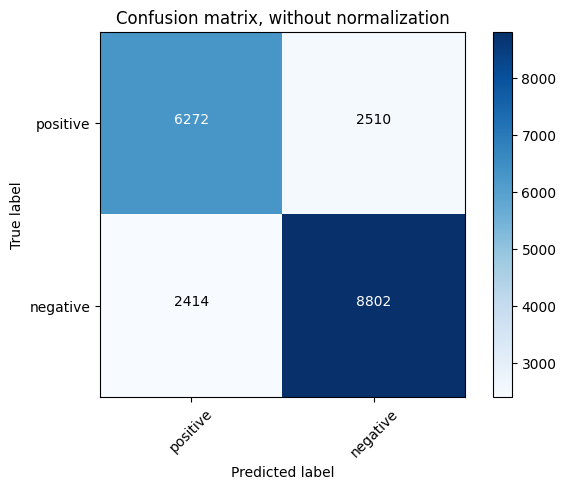

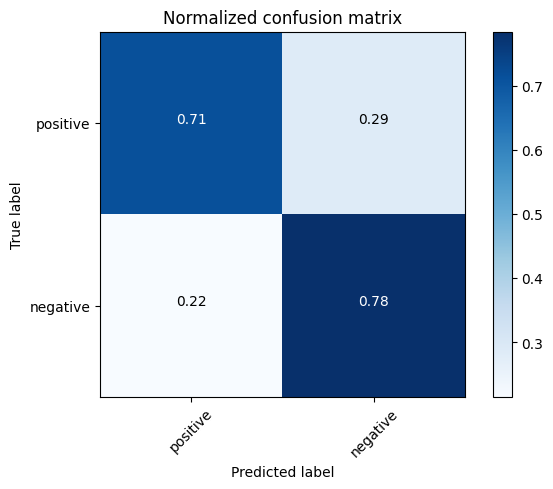

In [15]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [16]:
X_test=vectorizer.transform(SentimentText_test)

In [17]:
# checking the shape
X_test.shape

(299989, 41679)

In [18]:
# predicting the sentiments using trained classifier
predicted = model.predict(X_test)

In [19]:
predicted.shape

(299989,)

In [20]:
# this code generates output csv on the test set
output = pd.read_csv('test.csv', encoding = 'ISO-8859-1')
# output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output1.csv', index = False)



> Using Bigram



In [21]:
#Finding the bigram representation
bigram_vectorizer=CountVectorizer(ngram_range=(1,2))

In [22]:
with open('SentimentText_train.txt', 'rb') as f:
    SentimentText = pickle.load(f)

In [98]:
X=bigram_vectorizer.fit_transform(SentimentText_train)

In [99]:
#Splitting the data into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size =0.2,random_state = 0)

In [100]:
X_train.shape

(79991, 428766)

In [101]:
# fitting the multinomial bayes classifier
model = MultinomialNB()

In [102]:
model.fit(X_train,y_train)

MultinomialNB()

In [103]:
#training score
model.score(X_train,y_train)

0.9396557112675176

In [104]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7676767676767676

Confusion matrix, without normalization
[[6525 2257]
 [2389 8827]]
Normalized confusion matrix
[[0.74 0.26]
 [0.21 0.79]]


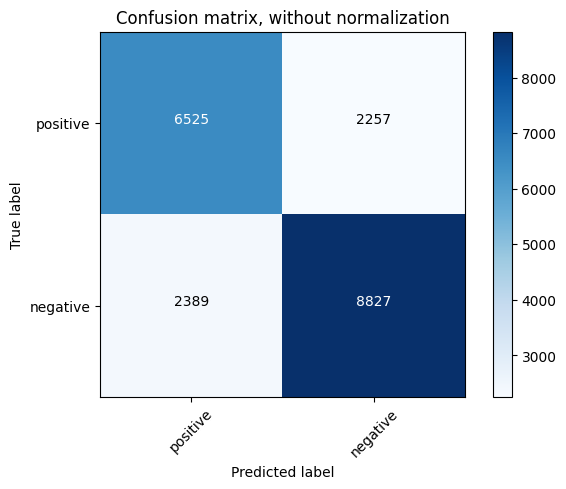

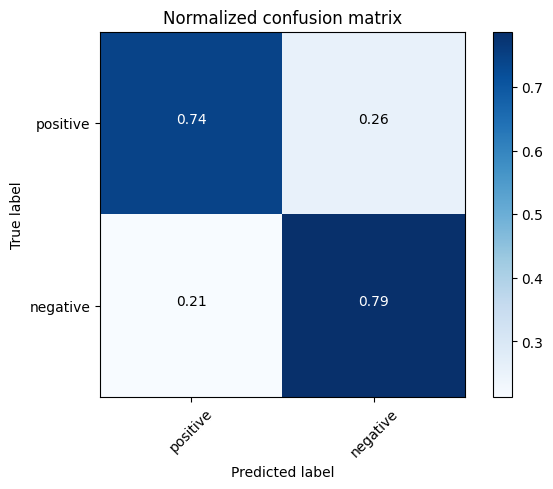

In [30]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [31]:
X_test=bigram_vectorizer.transform(SentimentText_test)

In [32]:
X_test.shape

(299989, 428766)

In [33]:
predicted = model.predict(X_test)


In [34]:
predicted.shape

(299989,)

In [35]:
# this code generates output csv on the test set
output = pd.read_csv('test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output2.csv', index = False)

>Using Unigram and Bigram simultaneously

In [106]:
X_unigrams = vectorizer.fit_transform(SentimentText_train)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText_train)

In [107]:
from scipy.sparse import hstack
X_combined = hstack([X_unigrams , X_bigrams])

In [108]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,test_size =0.2 , random_state = 0)

In [109]:
# fitting the multinomial bayes classifier
model = MultinomialNB()

In [125]:
model.fit(X_train,y_train)

MultinomialNB()

In [126]:
#training score
model.score(X_train,y_train)

0.9607955895038192

In [127]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7697769776977698

Confusion matrix, without normalization
[[6639 2143]
 [2466 8750]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


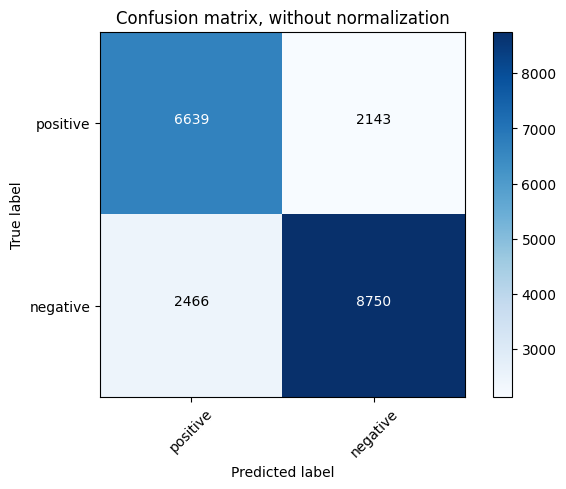

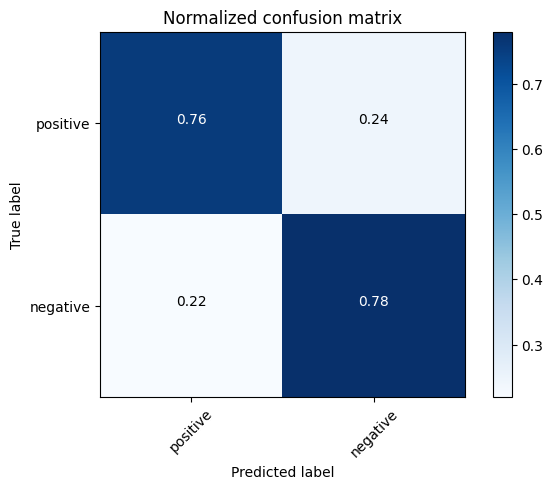

In [43]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [118]:
X_test_unigrams = vectorizer.transform(SentimentText_test)
X_test_bigrams = bigram_vectorizer.transform(SentimentText_test)

In [45]:
X_test_unigrams.shape

(299989, 41679)

In [46]:
X_test_bigrams.shape

(299989, 428766)

In [47]:
from scipy.sparse import hstack
X_test_combined = hstack([X_test_unigrams , X_test_bigrams])

In [48]:
X_test_combined.shape

(299989, 470445)

In [49]:
predicted = model.predict(X_test_combined)

In [50]:
predicted.shape

(299989,)

In [51]:
# this code generates output csv on the test set

output = pd.read_csv('test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output3.csv', index = False)

> Using Unigram,Bigram and Trigram simultaneously

In [129]:
#Finding the trigram representation
trigram_vectorizer=CountVectorizer(ngram_range=(1,3))

In [130]:
X_unigrams = vectorizer.fit_transform(SentimentText_train)
X_bigrams = bigram_vectorizer.fit_transform(SentimentText_train)
X_trigrams = trigram_vectorizer.fit_transform(SentimentText_train)

In [131]:
from scipy.sparse import hstack
X_combined = hstack([X_unigrams , X_bigrams, X_trigrams])

In [132]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X_combined,y,test_size =0.2,random_state = 0)

In [133]:
# fitting the multinomial bayes classifier
model = MultinomialNB()

In [134]:
model.fit(X_train,y_train)

MultinomialNB()

In [135]:
#training score
model.score(X_train,y_train)

0.9607955895038192

In [136]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7697769776977698

Confusion matrix, without normalization
[[6652 2130]
 [2474 8742]]
Normalized confusion matrix
[[0.76 0.24]
 [0.22 0.78]]


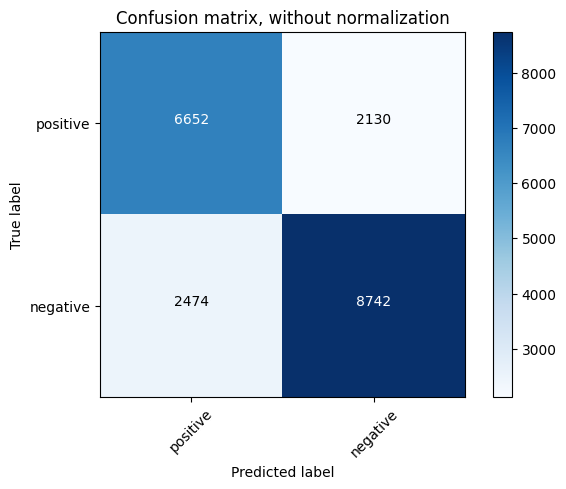

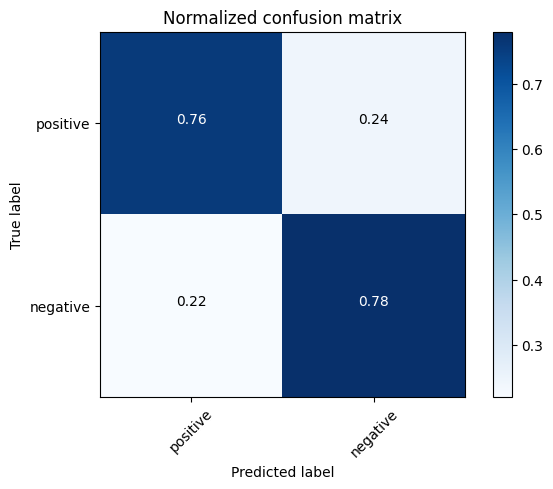

In [60]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [61]:
X_test_unigrams = vectorizer.transform(SentimentText_test)
X_test_bigrams = bigram_vectorizer.transform(SentimentText_test)
X_test_trigrams = trigram_vectorizer.transform(SentimentText_test)

In [62]:
from scipy.sparse import hstack
X_test_combined = hstack([X_test_unigrams , X_test_bigrams,X_test_trigrams])

In [63]:
X_test_combined.shape

(299989, 1648911)

In [64]:
predicted = model.predict(X_test_combined)

In [65]:
predicted.shape

(299989,)

In [66]:
# this code generates output csv on the test set

output = pd.read_csv('test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output4.csv', index = False)

> Using Trigram

In [67]:
#Finding the trigram representation
trigram_vectorizer=CountVectorizer(ngram_range=(1,3))

In [68]:
X=trigram_vectorizer.fit_transform(SentimentText_train)

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train ,y_test = train_test_split(X,y,test_size =0.2,random_state = 0)

In [70]:
# fitting the multinomial bayes classifier
model = MultinomialNB()

In [71]:
model.fit(X_train,y_train)

MultinomialNB()

In [72]:
#training score
model.score(X_train,y_train)

0.9768223925191584

In [73]:
y_pred = model.predict(X_test)
# testing score
model.score(X_test, y_test)

0.7647264726472647

Confusion matrix, without normalization
[[6584 2198]
 [2507 8709]]
Normalized confusion matrix
[[0.75 0.25]
 [0.22 0.78]]


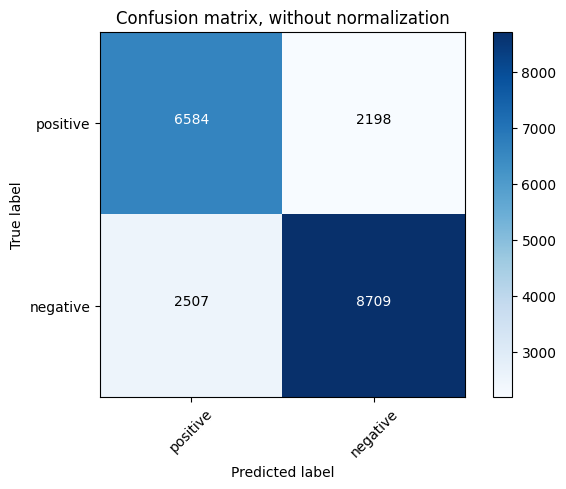

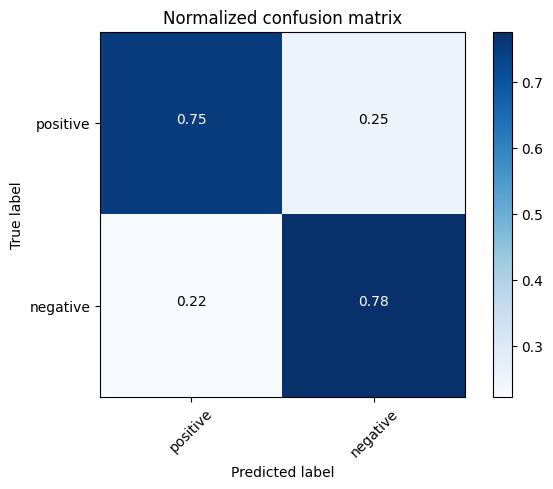

In [74]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["positive", "negative"], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [75]:
X_test=trigram_vectorizer.transform(SentimentText_test)

In [76]:
X_test.shape

(299989, 1178466)

In [77]:
predicted = model.predict(X_test)

In [78]:
predicted.shape

(299989,)

In [79]:
# this code generates output csv on the test set
output = pd.read_csv('test.csv', encoding = 'ISO-8859-1')
output.drop(['SentimentText'],axis = 1)
output['Sentiment'] = predicted
output.to_csv('output5.csv', index = False)

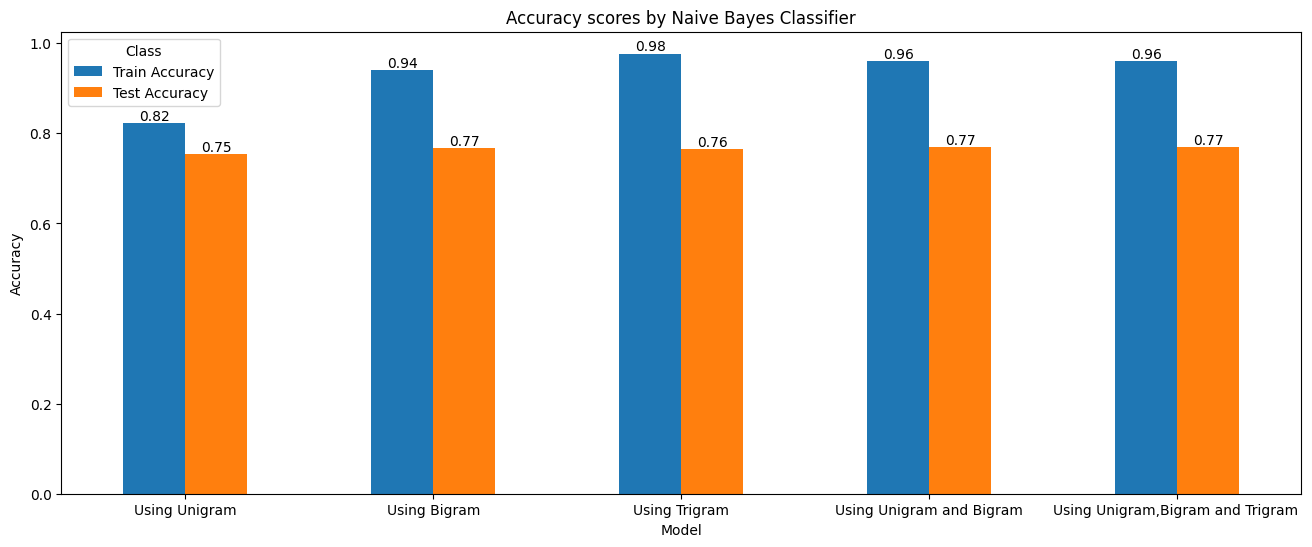

In [150]:
# Import matplotlib and pandas
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with the accuracy scores for each model and class
data = {'Model': ['Using Unigram', 'Using Bigram','Using Trigram','Using Unigram and Bigram', 'Using Unigram,Bigram and Trigram '],
        'Train Accuracy': [0.821979972746934,0.9396557112675176,0.9768223925191584,0.9607955895038192,0.9607955895038192],
        'Test Accuracy': [0.7537753775377538,0.7676767676767676,0.7647264726472647,0.7697769776977698,0.7697769776977698]}

df = pd.DataFrame(data)

# Plot the bar chart with multiple bars for each model
fig, ax = plt.subplots() # Create a figure and an axis object
ax = df.plot(x='Model', kind='bar', figsize=(16, 6), rot=0, ax=ax) # Use the same axis object for plotting
plt.title('Accuracy scores by Naive Bayes Classifier')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.legend(title='Class')

# Get the bars from the plot
bars = ax.patches

# Write the value on each bar using a loop
for bar in bars:
    # Get the x and y coordinates of the bar
    x = bar.get_x() + bar.get_width() / 2 # The center of the bar
    y = bar.get_height() # The top of the bar

    # Format the value as a string with two decimal places
    value = f'{y:.2f}'

    # Add the text annotation to the plot
    ax.text(x, y, value, ha='center', va='bottom', color='black') # Use 'center' and 'bottom' alignment and black color

plt.show()
